Import Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
!pip install statsmodels scipy
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_harvey_collier
from statsmodels.stats.api import anova_lm
from scipy.stats import shapiro, levene

Upload Data

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving INF2178_A3_data.csv to INF2178_A3_data.csv
User uploaded file "INF2178_A3_data.csv" with length 595634 bytes


In [ ]:
assignment3_data = "INF2178_A3_data.csv"
assignment3_data= pd.read_csv(assignment3_data)
assignment3_data

Data Cleaning

In [5]:
# Remove duplicates
assignment3_data = assignment3_data.drop_duplicates()

# Drop rows with any missing values
assignment3_data = assignment3_data.dropna()

In [ ]:
# Get the descriptive statistics for all the columns in the dataset
descriptive_stats = assignment3_data.describe()

# Output the descriptive statistics to the console
print(descriptive_stats)

Exploratory Data Analysis

Bar Graphs

<ipython-input-36-dbd926e8bbdd>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='incomegroup', data=assignment3_data, palette="Set2").set_title('Distribution of Income Groups')


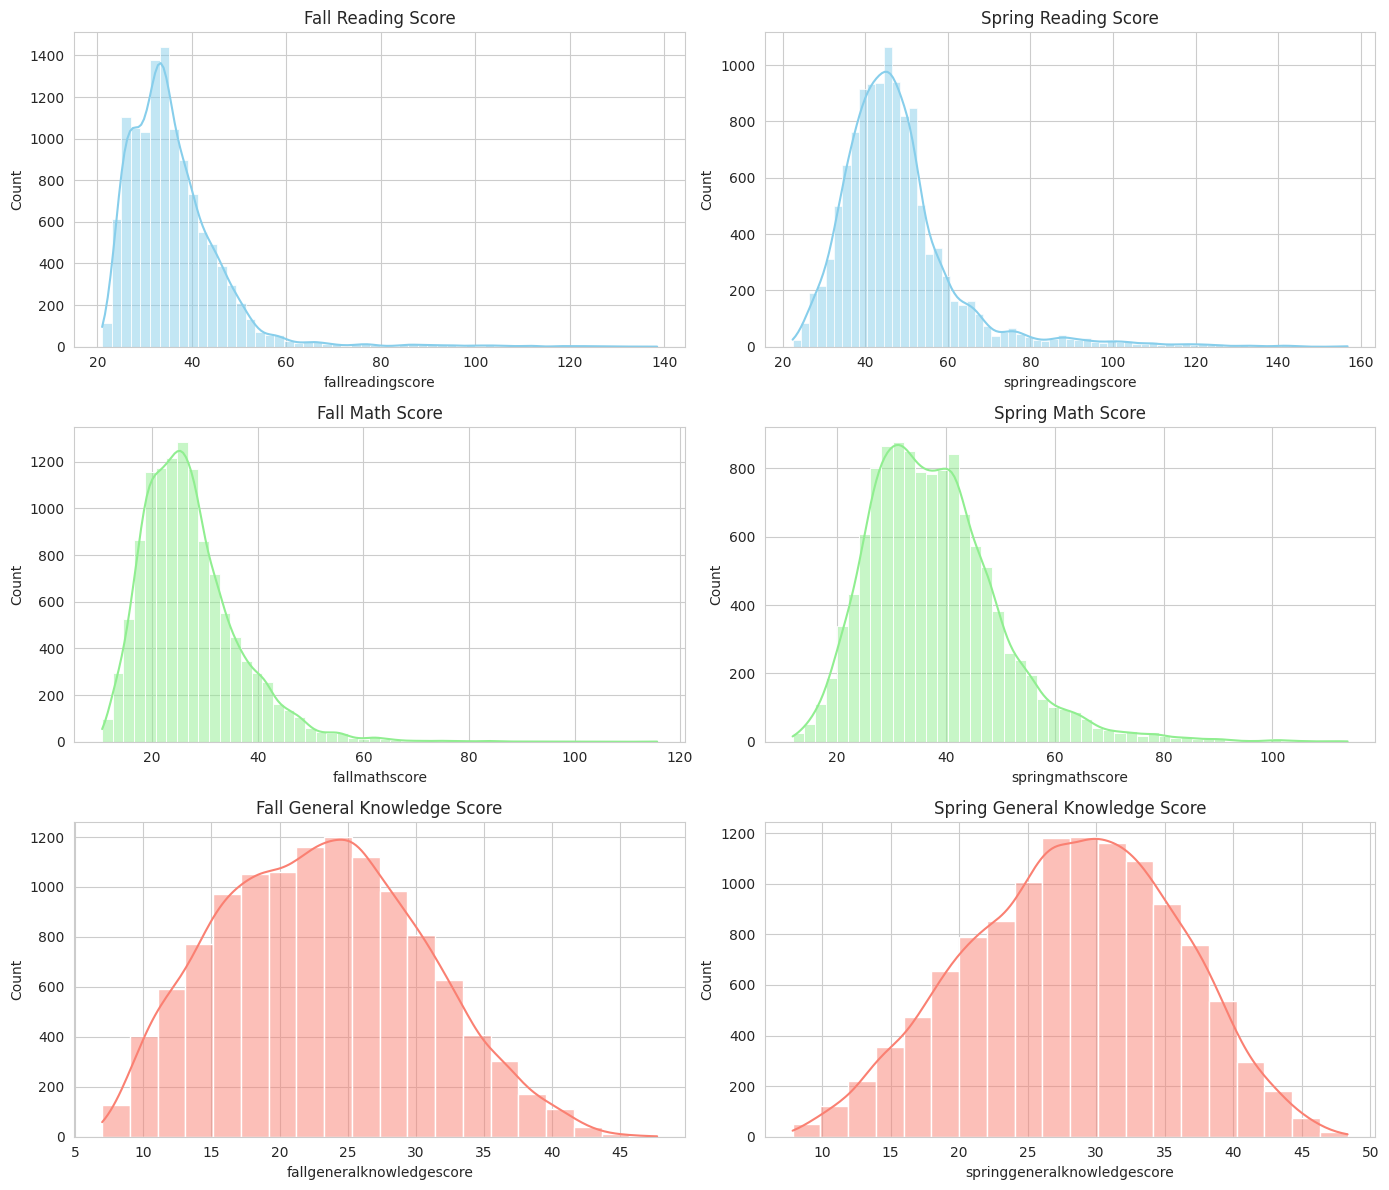

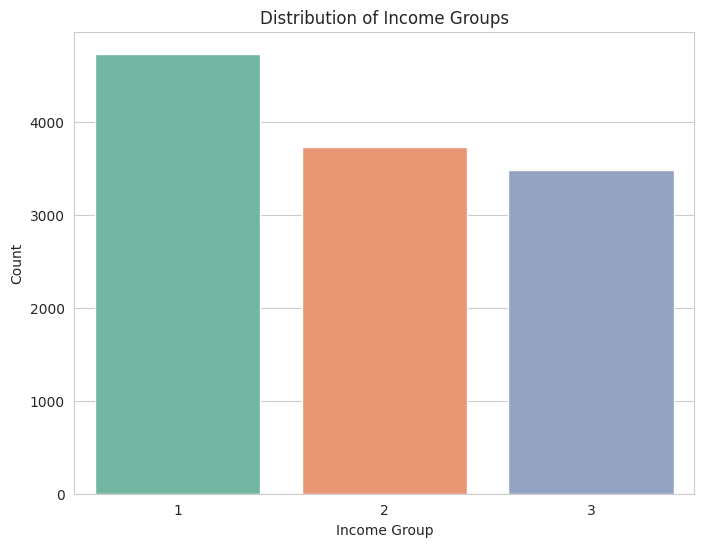

In [36]:
# Set the style of the plots to 'whitegrid' for better readability
sns.set_style("whitegrid")

# Create a 3x2 subplot structure for displaying histograms of scores
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# Define a common bin width for all histograms
bin_width = 2

# Calculate the number of bins for each histogram using the common bin width.
# Plot histograms with improved labels and consistent bar width

# Fall Reading Score
bins_fall_reading = int((assignment3_data['fallreadingscore'].max() - assignment3_data['fallreadingscore'].min()) / bin_width)
sns.histplot(data=assignment3_data, x="fallreadingscore", kde=True, bins=bins_fall_reading, ax=axs[0, 0], color="skyblue").set_title('Fall Reading Score')

# Fall Math Score
bins_fall_math = int((assignment3_data['fallmathscore'].max() - assignment3_data['fallmathscore'].min()) / bin_width)
sns.histplot(data=assignment3_data, x="fallmathscore", kde=True, bins=bins_fall_math, ax=axs[1, 0], color="lightgreen").set_title('Fall Math Score')

# Fall General Knowledge Scores
bins_fall_general_knowledge = int((assignment3_data['fallgeneralknowledgescore'].max() - assignment3_data['fallgeneralknowledgescore'].min()) / bin_width)
sns.histplot(data=assignment3_data, x="fallgeneralknowledgescore", kde=True, bins=bins_fall_general_knowledge, ax=axs[2, 0], color="salmon").set_title('Fall General Knowledge Score')

# Spring Reading Scores
bins_spring_reading = int((assignment3_data['springreadingscore'].max() - assignment3_data['springreadingscore'].min()) / bin_width)
sns.histplot(data=assignment3_data, x="springreadingscore", kde=True, bins=bins_spring_reading, ax=axs[0, 1], color="skyblue").set_title('Spring Reading Score')

# Spring Math Scores
bins_spring_math = int((assignment3_data['springmathscore'].max() - assignment3_data['springmathscore'].min()) / bin_width)
sns.histplot(data=assignment3_data, x="springmathscore", kde=True, bins=bins_spring_math, ax=axs[1, 1], color="lightgreen").set_title('Spring Math Score')

# Spring General Knowledge Scores
bins_spring_general_knowledge = int((assignment3_data['springgeneralknowledgescore'].max() - assignment3_data['springgeneralknowledgescore'].min()) / bin_width)
sns.histplot(data=assignment3_data, x="springgeneralknowledgescore", kde=True, bins=bins_spring_general_knowledge, ax=axs[2, 1], color="salmon").set_title('Spring General Knowledge Score')

# Ensure the plots do not overlap and are neatly arranged
plt.tight_layout()

# Create a new figure for plotting the distribution of income groups
plt.figure(figsize=(8, 6))

# Use a count plot to visualize the number of students in each income group
# 'Set2' palette is chosen for visually distinct colors
sns.countplot(x='incomegroup', data=assignment3_data, palette="Set2").set_title('Distribution of Income Groups')

# Improve the labels for better readability and consistency
plt.xlabel('Income Group')
plt.ylabel('Count')

# Display the plots
plt.show()


Boxplots

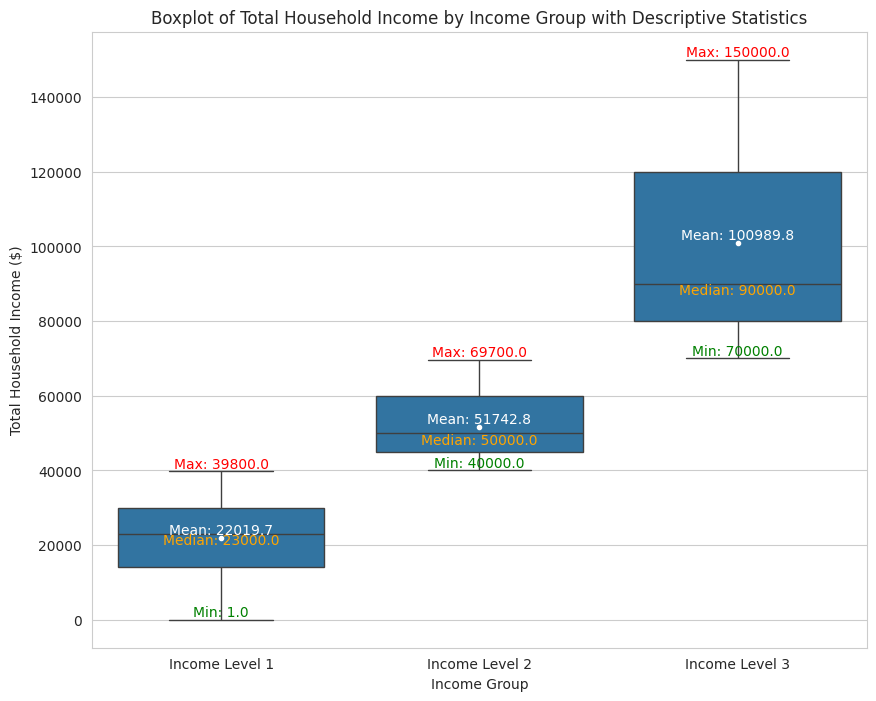

In [37]:
# Boxplots for Income Levels

# Create the boxplot with mean shown as a green triangle
plt.figure(figsize=(10, 8))
boxplot = sns.boxplot(x='incomegroup', y='totalhouseholdincome', data=assignment3_data, showmeans=True,
                      meanprops={"marker":"o",
                                 "markerfacecolor":"white",
                                 "markeredgecolor":"white",
                                 "markersize":"3"})

# Improve the aesthetics
plt.title('Boxplot of Total Household Income by Income Group with Descriptive Statistics')
plt.xlabel('Income Group')
plt.ylabel('Total Household Income ($)')
plt.xticks([0, 1, 2], ['Income Level 1', 'Income Level 2', 'Income Level 3'])

# Calculate descriptive statistics for annotations
income_stats = assignment3_data.groupby('incomegroup')['totalhouseholdincome'].describe()

# Annotate with max, min, mean, and median
for i in range(income_stats.shape[0]):
    # Annotate the Mean
    plt.text(x=i, y=income_stats.iloc[i]['mean'], s=f"Mean: {income_stats.iloc[i]['mean']:.1f}",
             color='white', ha='center', va='bottom')
    # Annotate the Median
    plt.text(x=i, y=income_stats.iloc[i]['50%'], s=f"Median: {income_stats.iloc[i]['50%']:.1f}",
             color='orange', ha='center', va='top')
    # Annotate the Min
    plt.text(x=i, y=income_stats.iloc[i]['min'], s=f"Min: {income_stats.iloc[i]['min']:.1f}",
             color='green', ha='center', va='bottom')
    # Annotate the Max
    plt.text(x=i, y=income_stats.iloc[i]['max'], s=f"Max: {income_stats.iloc[i]['max']:.1f}",
             color='red', ha='center', va='bottom')
plt.show()


In [38]:
# Calculate descriptive statistics for 'totalhouseholdincome' grouped by 'incomegroup'
income_stats = assignment3_data.groupby('incomegroup')['totalhouseholdincome'].describe()

# Select the relevant statistics and rename '50%' to 'median'
selected_stats = income_stats[['min', 'mean', '50%', 'max']].rename(columns={'50%': 'median'})

# Print the selected statistics as a table
print(selected_stats.to_string(index=True))

                 min           mean   median       max
incomegroup                                           
1                1.0   22019.718482  23000.0   39800.0
2            40000.0   51742.759528  50000.0   69700.0
3            70000.0  100989.757352  90000.0  150000.0


Exploring Scores by Income Cateogory

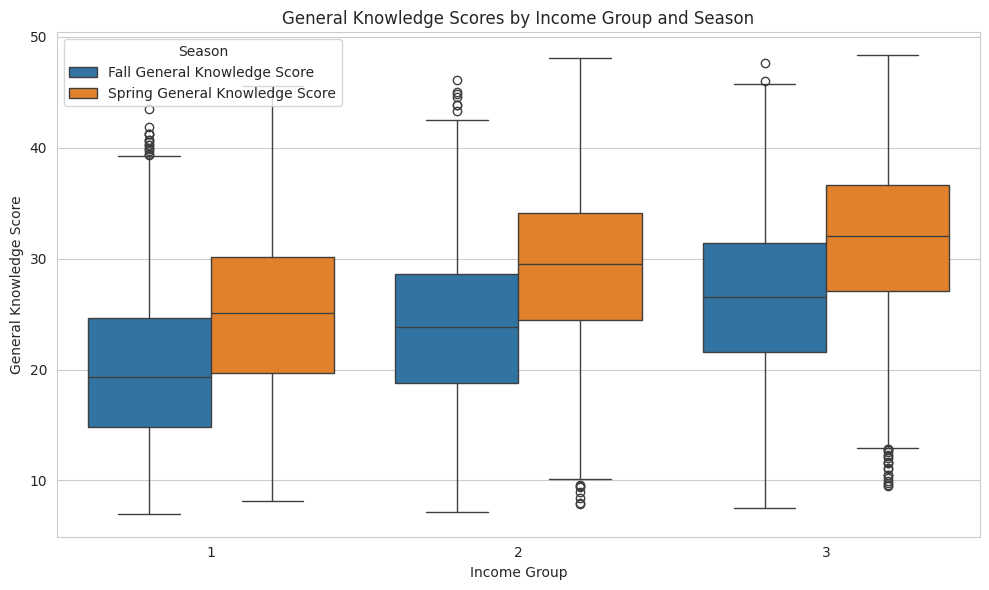

In [18]:
# Combine the fall and spring scores into a single DataFrame for boxplot
# Melt the DataFrame to go from wide to long format for the scores
combined_data = pd.melt(assignment3_data, id_vars=['incomegroup'],
                        value_vars=['fallgeneralknowledgescore', 'springgeneralknowledgescore'],
                        var_name='Season', value_name='General Knowledge Score')

# Replace the column values to have more readable category names
combined_data['Season'] = combined_data['Season'].replace({
    'fallgeneralknowledgescore': 'Fall General Knowledge Score',
    'springgeneralknowledgescore': 'Spring General Knowledge Score'
})

# Now create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='incomegroup', y='General Knowledge Score', hue='Season',
            palette=['#1f77b4', '#ff7f0e'])

# Customize the plot with title and labels as in the image
plt.title('General Knowledge Scores by Income Group and Season')
plt.xlabel('Income Group')
plt.ylabel('General Knowledge Score')

# Show the legend if needed
plt.legend(title='Season')

# Show the plot
plt.tight_layout()
plt.show()

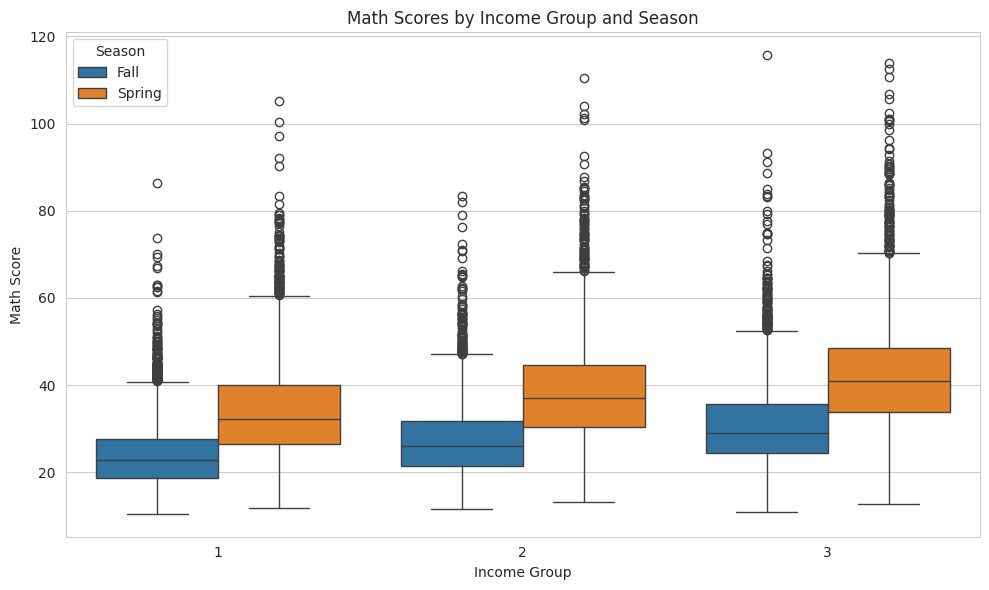

In [40]:
# Combine the fall and spring scores into a single DataFrame for plotting
fall_data = assignment3_data[['incomegroup', 'fallmathscore']].copy()
fall_data['Season'] = 'Fall'
spring_data = assignment3_data[['incomegroup', 'springmathscore']].copy()
spring_data['Season'] = 'Spring'

combined_data = pd.concat([fall_data.rename(columns={'fallmathscore': 'Score'}),
                           spring_data.rename(columns={'springmathscore': 'Score'})])

# Plot the boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='incomegroup', y='Score', hue='Season', palette=['#1f77b4', '#ff7f0e'])
plt.title('Math Scores by Income Group and Season')
plt.xlabel('Income Group')
plt.ylabel('Math Score')
plt.legend(title='Season')
plt.tight_layout()
plt.show()

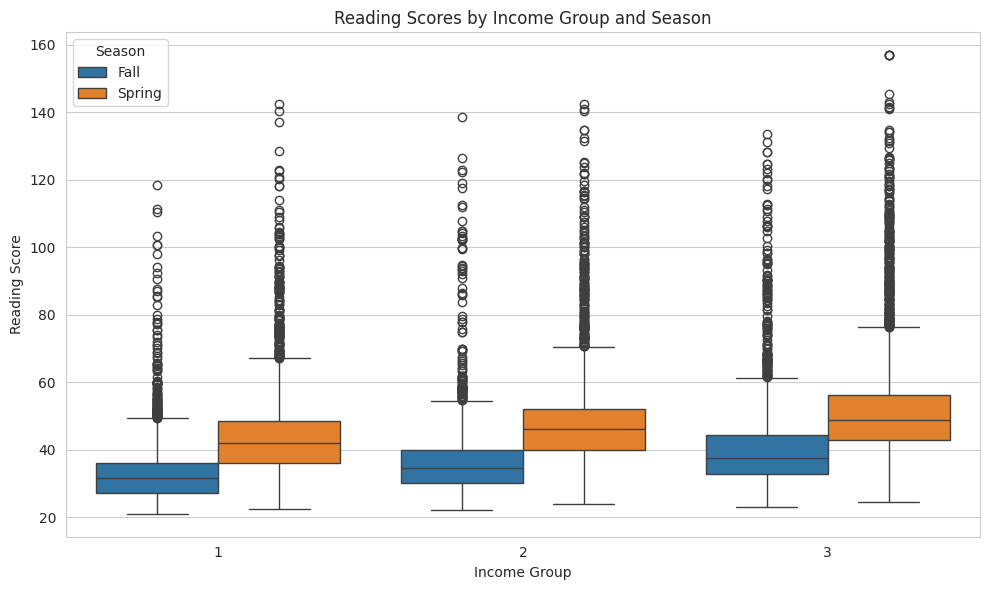

In [41]:
# Combine the fall and spring reading scores into one DataFrame
fall_data_reading = assignment3_data[['incomegroup', 'fallreadingscore']].copy()
fall_data_reading['Season'] = 'Fall'
spring_data_reading = assignment3_data[['incomegroup', 'springreadingscore']].copy()
spring_data_reading['Season'] = 'Spring'

# Concatenate the fall and spring data
combined_reading_data = pd.concat([
    fall_data_reading.rename(columns={'fallreadingscore': 'Reading Score'}),
    spring_data_reading.rename(columns={'springreadingscore': 'Reading Score'})
])

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='incomegroup', y='Reading Score', hue='Season', data=combined_reading_data, palette=['#1f77b4', '#ff7f0e'])
plt.title('Reading Scores by Income Group and Season')
plt.xlabel('Income Group')
plt.ylabel('Reading Score')
plt.legend(title='Season')
plt.tight_layout()
plt.show()


Checking for *Conditions*

Change in Math Scores by general Knowledge Scores Across Income Groups

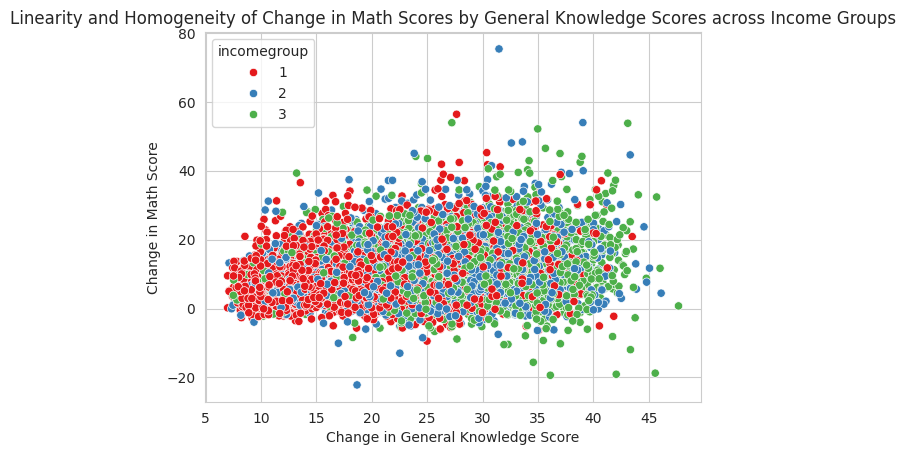

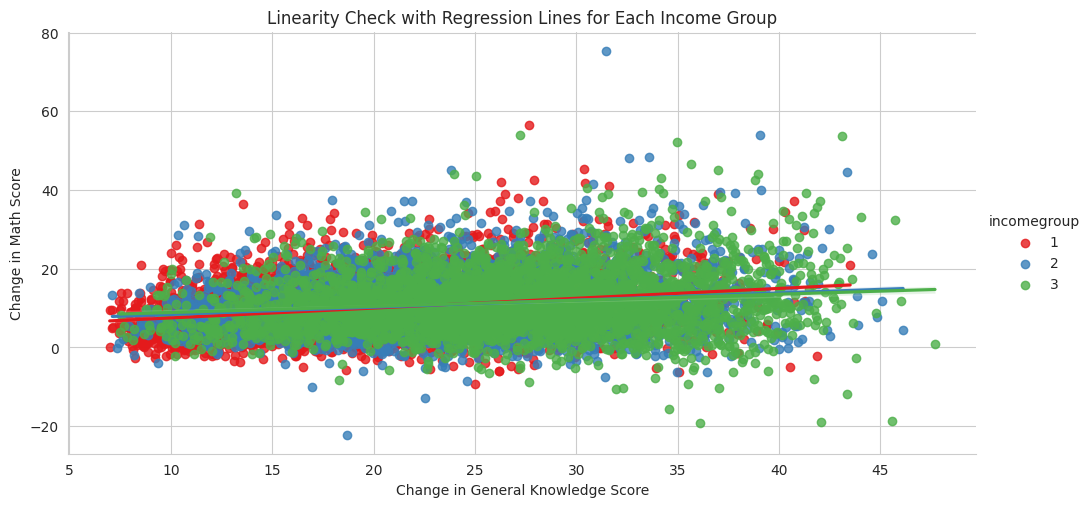

                             OLS Regression Results                             
Dep. Variable:     Change_in_Math_Score   R-squared:                       0.050
Model:                              OLS   Adj. R-squared:                  0.049
Method:                   Least Squares   F-statistic:                     124.4
Date:                  Sun, 24 Mar 2024   Prob (F-statistic):          7.91e-129
Time:                          02:43:01   Log-Likelihood:                -39600.
No. Observations:                 11933   AIC:                         7.921e+04
Df Residuals:                     11927   BIC:                         7.926e+04
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [42]:
# Calculate the change in math score as the difference between spring and fall scores
assignment3_data['Change_in_Math_Score'] = assignment3_data['springmathscore'] - assignment3_data['fallmathscore']

# Scatterplot for checking linearity
sns.scatterplot(x='fallgeneralknowledgescore', y='Change_in_Math_Score',
                hue='incomegroup', data=assignment3_data, palette='Set1')
plt.title('Linearity and Homogeneity of Change in Math Scores by General Knowledge Scores across Income Groups')
plt.xlabel('Change in General Knowledge Score')
plt.ylabel('Change in Math Score')
plt.show()

# Fit ANCOVA model to check linearity
model = ols('Change_in_Math_Score ~ C(incomegroup) * fallgeneralknowledgescore', data=assignment3_data).fit()

# Generate a scatter plot with regression lines for each income group
sns.lmplot(x='fallgeneralknowledgescore', y='Change_in_Math_Score', hue='incomegroup',
           data=assignment3_data, palette='Set1', height=5, aspect=2)

# Remove the legend from the scatter plot as we only want the lines
plt.legend([],[], frameon=False)

# Set title and labels
plt.title('Linearity Check with Regression Lines for Each Income Group')
plt.xlabel('Change in General Knowledge Score')
plt.ylabel('Change in Math Score')

# Show the plot
plt.show()

# Print the ANCOVA summary to inspect the homogeneity of regression slopes
print(model.summary())


In [34]:
# Fit the ANCOVA model to extract residuals
math_model = ols('Change_in_Math_Score ~ C(incomegroup) + fallgeneralknowledgescore', data=assignment3_data).fit()
math_residuals = math_model.resid

# Perform Shapiro-Wilk test for normality on the residuals
shapiro_test = shapiro(math_residuals)

# Perform Levene's test for homogeneity of variances
levene_test = levene(assignment3_data['fallgeneralknowledgescore'], math_residuals)

# Create a DataFrame to display the results in a table
test_results_df = pd.DataFrame({
    'Test': ['Shapiro-Wilk', 'Levene'],
    'Statistic': [shapiro_test[0], levene_test[0]],
    'p-value': [shapiro_test[1], levene_test[1]]
})

# Output the test results as a table
print(test_results_df)


           Test   Statistic       p-value
0  Shapiro-Wilk    0.966404  0.000000e+00
1        Levene  354.449601  1.688068e-78


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Change in Reading Scores by General Knowledge Scores Across Income Groups

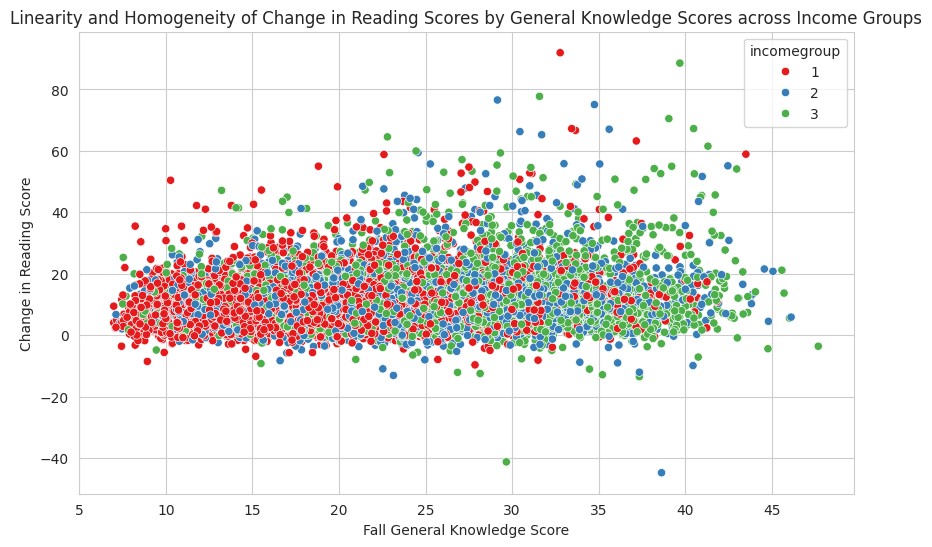

                               OLS Regression Results                              
Dep. Variable:     Change_in_Reading_Score   R-squared:                       0.025
Model:                                 OLS   Adj. R-squared:                  0.025
Method:                      Least Squares   F-statistic:                     62.07
Date:                     Sun, 24 Mar 2024   Prob (F-statistic):           4.15e-64
Time:                             01:13:42   Log-Likelihood:                -41719.
No. Observations:                    11933   AIC:                         8.345e+04
Df Residuals:                        11927   BIC:                         8.349e+04
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

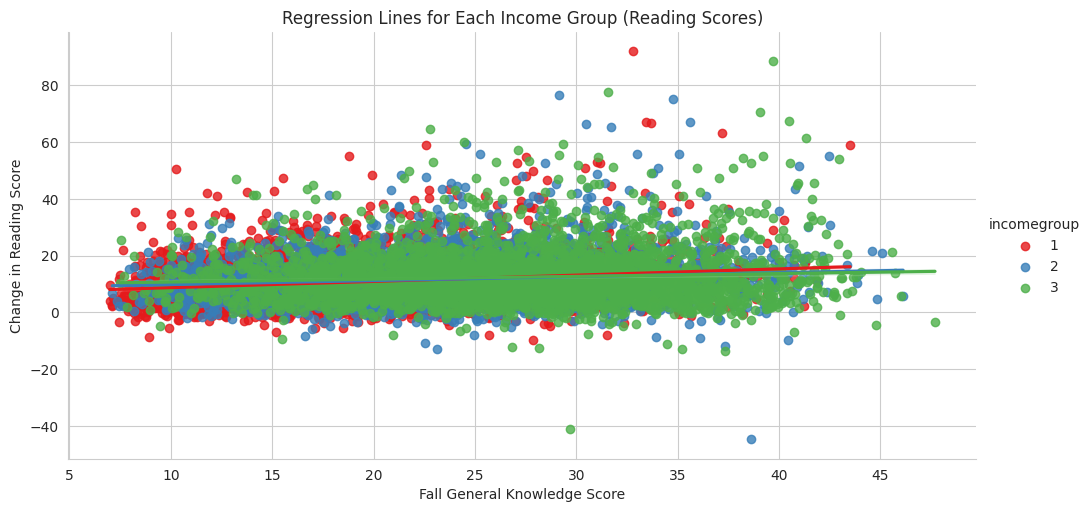

In [29]:
# Calculate the change in reading score as the difference between spring and fall reading scores
assignment3_data['Change_in_Reading_Score'] = assignment3_data['springreadingscore'] - assignment3_data['fallreadingscore']

# Scatterplot for checking linearity between the change in reading score and the fall general knowledge score
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='fallgeneralknowledgescore',
    y='Change_in_Reading_Score',
    hue='incomegroup',
    data=assignment3_data,
    palette='Set1'
)
plt.title('Linearity and Homogeneity of Change in Reading Scores by General Knowledge Scores across Income Groups')
plt.xlabel('Fall General Knowledge Score')
plt.ylabel('Change in Reading Score')
plt.show()

# Fit ANCOVA model to check for homogeneity of regression slopes
model = ols('Change_in_Reading_Score ~ C(incomegroup) * fallgeneralknowledgescore', data=assignment3_data).fit()

# Generate a scatter plot with regression lines for each income group
sns.lmplot(
    x='fallgeneralknowledgescore',
    y='Change_in_Reading_Score',
    hue='incomegroup',
    data=assignment3_data,
    palette='Set1',
    height=5,
    aspect=2
)

# Adjust further plot settings and display the plot
plt.title('Regression Lines for Each Income Group (Reading Scores)')
plt.xlabel('Fall General Knowledge Score')
plt.ylabel('Change in Reading Score')

# Print the ANCOVA summary to inspect the homogeneity of regression slopes
print(model.summary())


In [33]:
#Perform Wilk-Shapiro and Levene's Test
# Calculate the change in reading score
assignment3_data['Change_in_Reading_Score'] = assignment3_data['springreadingscore'] - assignment3_data['fallreadingscore']

# Fit the ANCOVA model
model = ols('Change_in_Reading_Score ~ C(incomegroup) + fallgeneralknowledgescore', data=assignment3_data).fit()

# Extract the residuals of the model
residuals = model.resid

# Perform Shapiro-Wilk test
shapiro_stats = shapiro(residuals)

# Perform Levene's test
levene_stats = levene(assignment3_data['fallgeneralknowledgescore'], residuals)

# Create a DataFrame to display the results in a table format
tests_df = pd.DataFrame({
    'Test': ['Shapiro-Wilk', 'Levene'],
    'Statistic': [shapiro_stats[0], levene_stats[0]],
    'p-value': [shapiro_stats[1], levene_stats[1]]
})

print(tests_df)


           Test  Statistic       p-value
0  Shapiro-Wilk   0.899632  0.000000e+00
1        Levene  49.198451  2.375083e-12


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ANCOVA for Spring Reading Score



In [44]:
# Define the model for ANCOVA using  'springreadingscore' as the dependent variable, 'incomegroup' as the factor (independent variable), and 'fallreadingscore' as the covariate.
model = ols('springreadingscore ~ incomegroup + fallreadingscore', data=assignment3_data).fit()

# Perform the ANCOVA and get the table of results
ancova_results = sm.stats.anova_lm(model, typ=2)  # typ=2 specifies the type-II sum of squares, which is commonly used

# Display the ANCOVA table
print(ancova_results)

                        sum_sq       df             F    PR(>F)
incomegroup       4.699812e+02      1.0      7.429586  0.006425
fallreadingscore  1.547013e+06      1.0  24455.584711  0.000000
Residual          7.546687e+05  11930.0           NaN       NaN


ANCOVA for Spring Math Scores

In [45]:
# ANCOVA for 'springmathscore' as the dependent variable, using 'incomegroup' as the factor (independent variable), and 'fallmathscore' as the covariate.
model_math = ols('springmathscore ~ incomegroup + fallmathscore', data=assignment3_data).fit()
ancova_results_math = sm.stats.anova_lm(model_math, typ=2)  # Using type-II sum of squares

# Print the ANCOVA results for math scores
print("ANCOVA Results for Spring Math Scores:\n", ancova_results_math)


ANCOVA Results for Spring Math Scores:
                      sum_sq       df             F        PR(>F)
incomegroup    1.600557e+03      1.0     34.616102  4.123521e-09
fallmathscore  1.026633e+06      1.0  22203.535082  0.000000e+00
Residual       5.516116e+05  11930.0           NaN           NaN


ANCOVA for Spring Genral Knoweldge Scores

In [46]:
# ANCOVA for spring general knowledge scores, using 'incomegroup' as the factor (independent variable), and 'fallgeneralknowledgescore' as the covariate.

model_gk = ols('springgeneralknowledgescore ~ incomegroup + fallgeneralknowledgescore', data=assignment3_data).fit()
ancova_results_gk = sm.stats.anova_lm(model_gk, typ=2)  # Using type-II sum of squares

# Print the ANCOVA results for general knowledge scores
print("ANCOVA Results for Spring General Knowledge Scores:\n", ancova_results_gk)


ANCOVA Results for Spring General Knowledge Scores:
                                   sum_sq       df             F        PR(>F)
incomegroup                  1614.072508      1.0    104.490831  1.991221e-24
fallgeneralknowledgescore  413465.233250      1.0  26766.657340  0.000000e+00
Residual                   184283.011886  11930.0           NaN           NaN
